Nasa Weather on mars wheeey!

In [ ]:
import requests

api_key = "fPgPWhtB3vg7XIt7MvlCW0bmaFo86LMH2K5SnG4g"
base_url = "https://api.nasa.gov/insight_weather/?api_key=DEMO_KEY&feedtype=json&ver=1.0"
# base_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?&table=exoplanets&format=ipac&where=pl_kepflag=1"
url = f"{base_url}&api_key={api_key}"

response = requests.get(url)

if response.status_code == 200:
    print("Here is the result from the API:")
    print(response.text)
    json_string = response.text
else:
    print("Error: Unable to get data from Nasa API! :(")

Here is the result from the API:
{
  "675": {
    "AT": {
      "av": -62.314, 
      "ct": 177556, 
      "mn": -96.872, 
      "mx": -15.908
    }, 
    "First_UTC": "2020-10-19T18:32:20Z", 
    "HWS": {
      "av": 7.233, 
      "ct": 88628, 
      "mn": 1.051, 
      "mx": 22.455
    }, 
    "Last_UTC": "2020-10-20T19:11:55Z", 
    "Month_ordinal": 10, 
    "Northern_season": "early winter", 
    "PRE": {
      "av": 750.563, 
      "ct": 887776, 
      "mn": 722.0901, 
      "mx": 768.791
    }, 
    "Season": "fall", 
    "Southern_season": "early summer", 
    "WD": {
      "0": {
        "compass_degrees": 0.0, 
        "compass_point": "N", 
        "compass_right": 0.0, 
        "compass_up": 1.0, 
        "ct": 254
      }, 
      "1": {
        "compass_degrees": 22.5, 
        "compass_point": "NNE", 
        "compass_right": 0.382683432365, 
        "compass_up": 0.923879532511, 
        "ct": 1
      }, 
      "10": {
        "compass_degrees": 225.0, 
        "compass_p

now lets make it look pretty i guess, parsing json


In [4]:
data = response.json()   

sol_ids = data["sol_keys"]        
sorted_sol_ids = sorted(sol_ids, key=int)
last_three = sorted_sol_ids[-3:]    
for sol in last_three:
    print(f"Sol {sol}:")
    print(f"  Average temperature: {data[sol]['AT']['av']} °C")
    print(f"  Minimum temperature: {data[sol]['AT']['mn']} °C")
    print(f"  Maximum temperature: {data[sol]['AT']['mx']} °C")
    print()

Sol 679:
  Average temperature: -62.551 °C
  Minimum temperature: -96.644 °C
  Maximum temperature: -11.561 °C

Sol 680:
  Average temperature: -61.789 °C
  Minimum temperature: -96.811 °C
  Maximum temperature: -15.298 °C

Sol 681:
  Average temperature: -62.434 °C
  Minimum temperature: -95.447 °C
  Maximum temperature: -4.444 °C



Sol Overview
Extract sol_keys, sort numerically, pick the three most recent Sols. For each Sol, collect First_UTC, Last_UTC, and print a summary.

In [5]:
data = response.json()    #  JSON -> Python dict

sol_ids = data["sol_keys"]        
sorted_sol_ids = sorted(sol_ids, key=int)
last_three = sorted_sol_ids[-3:]    

for sol in last_three:
    sol_data = data[sol]
    first_utc = sol_data["First_UTC"]
    last_utc = sol_data["Last_UTC"]

    print(f"Sol {sol}:")
    print(f" First UTC: {first_utc}")
    print(f" Last UTC: {last_utc}")
   

Sol 679:
 First UTC: 2020-10-23T21:10:41Z
 Last UTC: 2020-10-24T21:50:16Z
Sol 680:
 First UTC: 2020-10-24T21:50:16Z
 Last UTC: 2020-10-25T22:29:51Z
Sol 681:
 First UTC: 2020-10-25T22:29:51Z
 Last UTC: 2020-10-26T23:09:26Z


Temperature Stats
From each Sol’s AT block, read mx, mn, av. Handle missing fields  (print “N/A” if AT or a value is missing).

In [6]:

data = response.json()    

sol_ids = data["sol_keys"]          #  strings
sorted_sol_ids = sorted(sol_ids, key=int)
last_three = sorted_sol_ids[-3:]  

for sol in last_three:
    sol_data = data[sol]
    if data[sol] == "N/A":
        print(f"N/A")
    else:
        temp_block = sol_data["AT"]
        temp_block.get("mx")
        temp_block.get("mn")
        temp_block.get("av")
        print(f"Sol {sol}:")
        print(f" Average temperature: {temp_block['av']} °C")
        print(f" Minimum temperature: {temp_block['mn']} °C")
        print(f" Maximum temperature: {temp_block['mx']} °C")
        print()

Sol 679:
 Average temperature: -62.551 °C
 Minimum temperature: -96.644 °C
 Maximum temperature: -11.561 °C

Sol 680:
 Average temperature: -61.789 °C
 Minimum temperature: -96.811 °C
 Maximum temperature: -15.298 °C

Sol 681:
 Average temperature: -62.434 °C
 Minimum temperature: -95.447 °C
 Maximum temperature: -4.444 °C



Wind Snapshot
From HWS, capture the average wind speed and, if the WD block exists, find the most-populated wind direction (look for the entry with the highest ct). 

In [7]:
data = response.json()    

sol_ids = data["sol_keys"]          
sorted_sol_ids = sorted(sol_ids, key=int)
last_three = sorted_sol_ids[-3:]  

for sol in last_three:
    sol_data = data[sol]

    hws = sol_data.get("HWS")

    if not hws:
        print(f" No wind readings available")
        continue

    avg_wind = hws.get("av", "N/A")
    max_wind = hws.get("mx", "N/A")
    min_wind = hws.get("mn", "N/A")
    
    wd = sol_data.get("WD")
    compass_point = "N/A"
    if wd:
        best_direction = None
        highest_count = 0
        for direction_data in wd.values():
            count = direction_data.get("ct", 0)
            if count > highest_count:
                highest_count = count
                best_direction = direction_data
        if best_direction:
            compass_point = best_direction.get("compass_point", "N/A")

    print(f"Sol {sol}:")
    print(f" Average wind speed: {avg_wind} m/s")
    print(f" Minimum wind speed: {min_wind} m/s")
    print(f" Maximum wind speed: {max_wind} m/s")
    print(f" Prevailing direction: {compass_point}")
    print()


Sol 679:
 Average wind speed: 5.565 m/s
 Minimum wind speed: 0.231 m/s
 Maximum wind speed: 19.409000000000002 m/s
 Prevailing direction: WNW

Sol 680:
 Average wind speed: 6.517 m/s
 Minimum wind speed: 0.275 m/s
 Maximum wind speed: 24.235 m/s
 Prevailing direction: WNW

Sol 681:
 Average wind speed: 5.632 m/s
 Minimum wind speed: 0.228 m/s
 Maximum wind speed: 18.577 m/s
 Prevailing direction: WNW



In [8]:
import pandas as pd

# InSight JSON has sol keys like "1000", plus some metadata keys
sol_keys = [k for k in data.keys() if k.isdigit()]
rows = []
for sol in sol_keys:
    rec = data[sol]
    AT  = rec.get("AT") or {}
    PRE = rec.get("PRE") or {}
    HWS = rec.get("HWS") or {}
    WD  = rec.get("WD") or {}
    mc  = (WD.get("most_common") or {})

    rows.append({
        "sol": int(sol),
        "earth_first_utc": rec.get("First_UTC"),
        "earth_last_utc": rec.get("Last_UTC"),
        "season": rec.get("Season"),
        "avg_temp_C": AT.get("av"),
        "min_temp_C": AT.get("mn"),
        "max_temp_C": AT.get("mx"),
        "avg_pressure_Pa": PRE.get("av"),
        "avg_wind_mps": HWS.get("av"),
        "prevailing_wind": mc.get("compass_point"),
    })

mars_df = pd.DataFrame(rows).sort_values("sol").reset_index(drop=True)
mars_df


,sol,earth_first_utc,earth_last_utc,season,avg_temp_C,min_temp_C,max_temp_C,avg_pressure_Pa,avg_wind_mps,prevailing_wind
0,675,2020-10-19T18:32:20Z,2020-10-20T19:11:55Z,fall,-62.314,-96.872,-15.908,750.563,7.233,WNW
1,676,2020-10-20T19:11:55Z,2020-10-21T19:51:31Z,fall,-62.812,-96.912,-16.499,749.090,8.526,WNW
2,677,2020-10-21T19:51:31Z,2020-10-22T20:31:06Z,fall,-63.056,-97.249,-16.853,748.698,7.887,WNW
3,678,2020-10-22T20:31:06Z,2020-10-23T21:10:41Z,fall,-62.562,-97.728,-9.055,743.741,5.246,WNW
4,679,2020-10-23T21:10:41Z,2020-10-24T21:50:16Z,fall,-62.551,-96.644,-11.561,744.529,5.565,WNW
5,680,2020-10-24T21:50:16Z,2020-10-25T22:29:51Z,fall,-61.789,-96.811,-15.298,743.990,6.517,WNW
6,681,2020-10-25T22:29:51Z,2020-10-26T23:09:26Z,fall,-62.434,-95.447,-4.444,743.550,5.632,WNW


In [10]:
# thermal swing (how wild the day was)
mars_df["thermal_swing_C"] = mars_df["max_temp_C"] - mars_df["min_temp_C"]

# a playful "camera_friendly" flag:
#   True if wind is calm-ish and pressure is above median (totally arbitrary but fun)
wind_ok = mars_df["avg_wind_mps"] < mars_df["avg_wind_mps"].median(skipna=True)
press_ok = mars_df["avg_pressure_Pa"] > mars_df["avg_pressure_Pa"].median(skipna=True)
mars_df["camera_friendly"] = (wind_ok & press_ok)

mars_df.tail(10)


,sol,earth_first_utc,earth_last_utc,season,avg_temp_C,min_temp_C,max_temp_C,avg_pressure_Pa,avg_wind_mps,prevailing_wind,thermal_swing_C,camera_friendly
0,675,2020-10-19T18:32:20Z,2020-10-20T19:11:55Z,fall,-62.314,-96.872,-15.908,750.563,7.233,WNW,80.964,False
1,676,2020-10-20T19:11:55Z,2020-10-21T19:51:31Z,fall,-62.812,-96.912,-16.499,749.090,8.526,WNW,80.413,False
2,677,2020-10-21T19:51:31Z,2020-10-22T20:31:06Z,fall,-63.056,-97.249,-16.853,748.698,7.887,WNW,80.396,False
3,678,2020-10-22T20:31:06Z,2020-10-23T21:10:41Z,fall,-62.562,-97.728,-9.055,743.741,5.246,WNW,88.673,False
4,679,2020-10-23T21:10:41Z,2020-10-24T21:50:16Z,fall,-62.551,-96.644,-11.561,744.529,5.565,WNW,85.083,False
5,680,2020-10-24T21:50:16Z,2020-10-25T22:29:51Z,fall,-61.789,-96.811,-15.298,743.990,6.517,WNW,81.513,False
6,681,2020-10-25T22:29:51Z,2020-10-26T23:09:26Z,fall,-62.434,-95.447,-4.444,743.550,5.632,WNW,91.003,False


In [11]:
top_swing = (mars_df.dropna(subset=["thermal_swing_C"])
                     .sort_values("thermal_swing_C", ascending=False)
                     .head(5)[["sol","thermal_swing_C","min_temp_C","max_temp_C","season"]])
top_swing


,sol,thermal_swing_C,min_temp_C,max_temp_C,season
6,681,91.003,-95.447,-4.444,fall
3,678,88.673,-97.728,-9.055,fall
4,679,85.083,-96.644,-11.561,fall
5,680,81.513,-96.811,-15.298,fall
0,675,80.964,-96.872,-15.908,fall


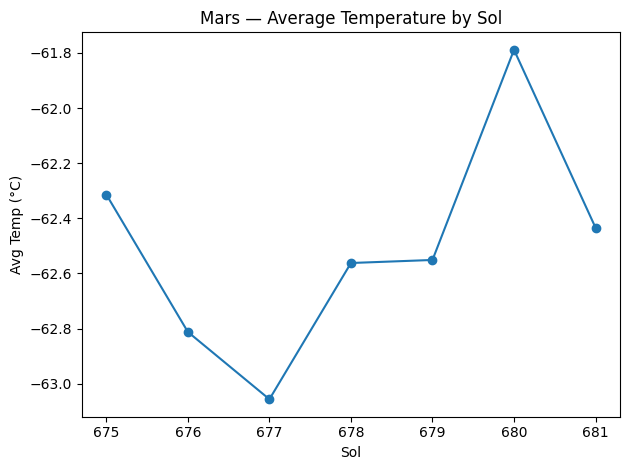

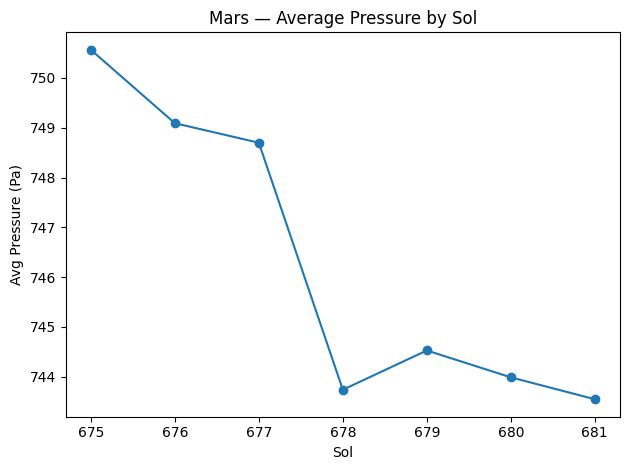

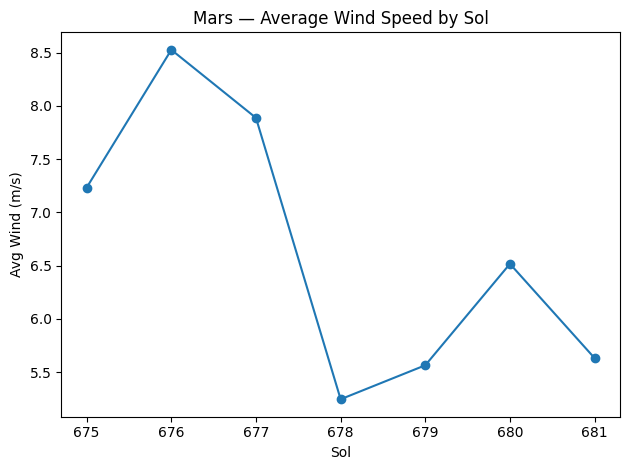

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) average temperature over sols
plt.figure()
plt.plot(mars_df["sol"], mars_df["avg_temp_C"], marker="o")
plt.title("Mars — Average Temperature by Sol")
plt.xlabel("Sol")
plt.ylabel("Avg Temp (°C)")
plt.tight_layout()
plt.show()

# 2) average pressure over sols
plt.figure()
plt.plot(mars_df["sol"], mars_df["avg_pressure_Pa"], marker="o")
plt.title("Mars — Average Pressure by Sol")
plt.xlabel("Sol")
plt.ylabel("Avg Pressure (Pa)")
plt.tight_layout()
plt.show()

# 3) average wind speed over sols
plt.figure()
plt.plot(mars_df["sol"], mars_df["avg_wind_mps"], marker="o")
plt.title("Mars — Average Wind Speed by Sol")
plt.xlabel("Sol")
plt.ylabel("Avg Wind (m/s)")
plt.tight_layout()
plt.show()


In [14]:
mars_df.to_csv("mars_insight_weather_tidy.csv", index=False)
print("Saved mars_insight_weather_tidy.csv")


Saved mars_insight_weather_tidy.csv
